n this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Load the housing prices data from Thinkful's database.
Split your data into train and test sets.
Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
import seaborn as sns

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df1 = pd.read_sql_query('select* from houseprices', con = engine)

engine.dispose()

Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
Is the performance of your model satisfactory? Why?


In [5]:
X = pd.concat([df1[['overallcond', 'grlivarea', 'garagecars']], pd.get_dummies(df1['mszoning'], prefix = 'mszoning', drop_first = True)], axis = 1)
y = df1['saleprice']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     359.3
Date:                Wed, 27 May 2020   Prob (F-statistic):          3.39e-285
Time:                        15:40:22   Log-Likelihood:                -14181.
No. Observations:                1168   AIC:                         2.838e+04
Df Residuals:                    1160   BIC:                         2.842e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.13e+05   1.84e+04     -6.135      0.000   -1.49e+05   -7.69e+04
overallcond  4376.7685   1208.565      3.621      0.000    2005.551    6747.986
grlivarea      88.0736      2.989     29.471      0.000      82.210      93.937
garagecars   3.733e+04   2120.488     17.602      0.000    3.32e+04    4.15e+04
mszoning_FV  8.545e+04   1.83e+04      4.669      0.000    4.95e+04    1.21e+05
mszoning_RH  6.481e+04   2.25e+04      2.885      0.004    2.07e+04    1.09e+05
mszoning_RL  7.562e+04   1.74e+04      4.355      0.000    4.16e+04     1.1e+05
mszoning_RM    4.8e+04   1.77e+04      2.718      0.007    1.34e+04    8.26e+04
==============================================================================
Omnibus:                      369.778   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2483.836
Skew:                           1.289   Prob(JB):                         0.00
Kurtosis:                       9.663   Cond. No.                     4.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

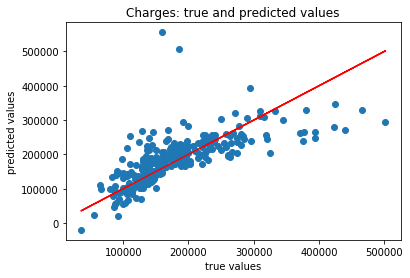

Mean absolute error of the prediction is: 34373.47085062828
Mean squared error of the prediction is: 2992263729.035291
Root mean squared error of the prediction is: 54701.58799372548
Mean absolute percentage error of the prediction is: 21.14066637805417


In [22]:
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


The model is performing fairly well. 

Try to improve your model in terms of predictive performance by adding or removing some variables.
Please submit a link your work notebook after you complete a couple assessment questions related to the assignment.

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [1]:
X1 = pd.concat([df1[['overallcond','grlivarea','fullbath','halfbath','garagecars']], pd.get_dummies(df1['mszoning'], prefix = 'mszoning', drop_first = True)], axis = 1)
y1 = df1['saleprice']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)
X1_train = sm.add_constant(X1_train)
X1_test = sm.add_constant(X1_test)

results = sm.OLS(y1_train, X1_train).fit()
results.summary()

NameError: name 'pd' is not defined

In [2]:
y1_preds = results.predict(X1_test)

plt.scatter(y1_test, y1_preds)
plt.plot(y1_test, y1_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y1_test, y1_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y1_test, y1_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y1_test, y1_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y1_test - y1_preds) / y1_test)) * 100))

NameError: name 'results' is not defined

Slightly tighter error or prediction with added features, but not much better than the first model with 4 less features.